## todo:
* sqft_above    - Square footage of living area above ground. Check if this is  sqft_living - sqft_basement?)

# General EDA
EDA playround to start to find interesting things.

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# set up pandas to display floats in a more human friendly way
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
df = pd.read_csv('../data/proc_kc_house_data.csv')
print(df.shape)
df.head(10)
len(df['id'].unique())

(21420, 28)


21420

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21420 entries, 0 to 21419
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  21420 non-null  int64  
 1   date                21420 non-null  object 
 2   price               21420 non-null  float64
 3   bedrooms            21420 non-null  int64  
 4   bathrooms           21420 non-null  float64
 5   sqft_living         21420 non-null  int64  
 6   sqft_lot            21420 non-null  int64  
 7   floors              21420 non-null  float64
 8   waterfront          21420 non-null  int64  
 9   view_rank           21420 non-null  int64  
 10  condition           21420 non-null  int64  
 11  grade               21420 non-null  int64  
 12  sqft_above          21420 non-null  int64  
 13  sqft_basement       21420 non-null  int64  
 14  yr_built            21420 non-null  int64  
 15  yr_renovated        21420 non-null  int64  
 16  zipc

# Processed Data Column Descriptions

* id            - Unique identifier for house
* date          - Date house was sold
* price         - Sales price of home - __this is the prediction target__
* bedrooms      - Number of bedrooms
* bathrooms     - Number of bathrooms
* sqft_living   - Square footage of living area
* sqft_lot      - Square footage of  lot
* floors        - # floors (levels) in house
* waterfront    - Number from 0 to 1 reflecting if house is categorized as a waterfront property - Categorical
* view_rank     - Number from 0 to 4 reflecting quality of sceanic view - Categorical
* condition     - Number from 1 to 5 reflecting the overall condition of the property - Categorical
* grade         - Number from 1 to 13 refelecting the overall grade given to the property, based on King County grading system
* sqft_above    - Square footage of living area above ground/ (is this sqft_living - sqft_basement?) from basement
* sqft_basement - Square footage of the basement
* yr_built      - Year house was built
* yr_renovated  - Year house was renovated
* zipcode       - zip code
* lat           - Latitude coordinate
* long          - Longitude coordinate
* sqft_living15 - Average square footage of living area of the nearest 15 neighbors 
* sqft_lot15    - Average square footage of the  lots of the nearest 15 neighbors
* date_month    - ADDED month of sale date
* date_day      - ADDED day of sale date
* date_year     - ADDED year of sale date
* renovated_status      - ADDED Value Y/N/UNK refelecting the renovated status
* sqft_living15_diff    - ADDED difference between home living area and nearest neighbors average living area
* sqft_lot15_diff       - ADDED difference between home lot and nearest neighbors average lot 
* scenic_status   - ADDED Value Y/N reflecting if the home is waterfront OR has view ranked above 1 (middle value of view quality scale).
    * Thanks to Data Science cohort members past and present for Data Column Descriptions

# Do basic data investigation
* Describe the data - mean, median, min, max
* Look for outliers

## General EDA Questions
### Are there any outliers in the dataset?


### 

In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view_rank,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,date_month,date_day,date_year,sqft_living15_diff,sqft_lot15_diff
count,"21,420.00","21,420.00","21,420.00","21,420.00","21,420.00","21,420.00","21,420.00","21,420.00","21,420.00","21,420.00",...,"21,420.00","21,420.00","21,420.00","21,420.00","21,420.00","21,420.00","21,420.00","21,420.00","21,420.00","21,420.00"
mean,"4,580,939,869.16","541,861.43",3.37,2.12,"2,083.13","15,128.04",1.50,0.01,0.23,3.41,...,"98,077.87",47.56,-122.21,"1,988.38","12,775.72",6.56,15.69,"2,014.33",94.75,"2,352.32"
std,"2,876,761,172.45","367,556.94",0.93,0.77,918.81,"41,530.80",0.54,0.08,0.77,0.65,...,53.48,0.14,0.14,685.54,"27,345.62",3.12,8.64,0.47,601.30,"29,022.93"
min,"1,000,102.00","78,000.00",1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,...,"98,001.00",47.16,-122.52,399.00,651.00,1.00,1.00,"2,014.00","-2,310.00","-326,879.00"
25%,"2,123,537,386.75","324,950.00",3.00,1.75,"1,430.00","5,040.00",1.00,0.00,0.00,3.00,...,"98,033.00",47.47,-122.33,"1,490.00","5,100.00",4.00,8.00,"2,014.00",-220.00,-420.25
50%,"3,904,921,185.00","450,550.00",3.00,2.25,"1,920.00","7,614.00",1.50,0.00,0.00,3.00,...,"98,065.00",47.57,-122.23,"1,840.00","7,620.00",6.00,16.00,"2,014.00",0.00,0.00
75%,"7,308,900,186.25","645,000.00",4.00,2.50,"2,550.00","10,690.50",2.00,0.00,0.00,4.00,...,"98,117.00",47.68,-122.12,"2,370.00","10,086.25",9.00,23.00,"2,015.00",310.00,680.00
max,"9,900,000,190.00","7,700,000.00",33.00,8.00,"13,540.00","1,651,359.00",3.50,1.00,4.00,5.00,...,"98,199.00",47.78,-121.31,"6,210.00","871,200.00",12.00,31.00,"2,015.00","8,690.00","1,225,778.00"


In [4]:
print('---- OUR TARGE: price -----')
print(df['price'].describe())        # that max is really huge! look for outliers

---- OUR TARGE: price -----
count      21,420.00
mean      541,861.43
std       367,556.94
min        78,000.00
25%       324,950.00
50%       450,550.00
75%       645,000.00
max     7,700,000.00
Name: price, dtype: float64


In [5]:
print(df['bedrooms'].describe())        # that max is really huge! look for outliers
print('---- sqft_living -----')
print(df['sqft_living'].describe())     # that max is really huge! Look for outliers
print('---- sqft_above -----')
print(df['sqft_above'].describe())      # that max is really huge! Look for outliers
print('---- sqft_basement -----')
print(df['sqft_basement'].describe())   # that max is really huge! Look for outliers

count   21,420.00
mean         3.37
std          0.93
min          1.00
25%          3.00
50%          3.00
75%          4.00
max         33.00
Name: bedrooms, dtype: float64
---- sqft_living -----
count   21,420.00
mean     2,083.13
std        918.81
min        370.00
25%      1,430.00
50%      1,920.00
75%      2,550.00
max     13,540.00
Name: sqft_living, dtype: float64
---- sqft_above -----
count   21,420.00
mean     1,791.17
std        828.69
min        370.00
25%      1,200.00
50%      1,560.00
75%      2,220.00
max      9,410.00
Name: sqft_above, dtype: float64
---- sqft_basement -----
count   21,420.00
mean       285.94
std        440.01
min          0.00
25%          0.00
50%          0.00
75%        550.00
max      4,820.00
Name: sqft_basement, dtype: float64


In [6]:
print(df['sqft_living15'].describe())       # that max is really huge! Look for outliers
print(df['sqft_lot15'].describe())          # that max is MASSIVELY huge! Look for outliers
print(df['sqft_living15_diff'].describe())   # that max is really huge! Look for outliers
print(df['sqft_lot15_diff'].describe())      # that max is MASSIVELY huge! Look for outliers

count   21,420.00
mean     1,988.38
std        685.54
min        399.00
25%      1,490.00
50%      1,840.00
75%      2,370.00
max      6,210.00
Name: sqft_living15, dtype: float64
count    21,420.00
mean     12,775.72
std      27,345.62
min         651.00
25%       5,100.00
50%       7,620.00
75%      10,086.25
max     871,200.00
Name: sqft_lot15, dtype: float64
count   21,420.00
mean        94.75
std        601.30
min     -2,310.00
25%       -220.00
50%          0.00
75%        310.00
max      8,690.00
Name: sqft_living15_diff, dtype: float64
count      21,420.00
mean        2,352.32
std        29,022.93
min      -326,879.00
25%          -420.25
50%             0.00
75%           680.00
max     1,225,778.00
Name: sqft_lot15_diff, dtype: float64


In [7]:
print(df['bathrooms'].describe())    # that max seems large! look for outliers.
print(df['floors'].describe())       # that max seems large! look for outliers.

count   21,420.00
mean         2.12
std          0.77
min          0.50
25%          1.75
50%          2.25
75%          2.50
max          8.00
Name: bathrooms, dtype: float64
count   21,420.00
mean         1.50
std          0.54
min          1.00
25%          1.00
50%          1.50
75%          2.00
max          3.50
Name: floors, dtype: float64


In [8]:
df['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [9]:
# The Zipcodes in King County
zipcodes = df['zipcode'].unique()
np.sort(zipcodes)

array([98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010,
       98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029,
       98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042,
       98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070,
       98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106,
       98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119,
       98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155,
       98166, 98168, 98177, 98178, 98188, 98198, 98199])

In [10]:
# Houses by zip code
houses_by_zip = df.groupby('zipcode')['id'].count()
houses_by_zip.sort_values(ascending=False, inplace=True)
print(len(houses_by_zip))
print(houses_by_zip.values)
print(houses_by_zip.index)

70
[600 586 576 571 548 546 543 498 492 490 484 465 451 442 435 431 411 404
 402 400 358 358 352 351 340 330 329 320 316 315 305 289 283 282 282 281
 276 275 272 271 268 264 264 263 260 258 254 253 250 233 229 218 197 196
 194 190 185 184 168 139 135 123 123 116 109 104  99  79  56  49]
Int64Index([98103, 98038, 98115, 98052, 98117, 98042, 98034, 98118, 98023,
            98006, 98133, 98059, 98058, 98155, 98074, 98033, 98027, 98056,
            98125, 98053, 98075, 98001, 98126, 98092, 98144, 98106, 98116,
            98029, 98199, 98004, 98065, 98122, 98008, 98028, 98040, 98146,
            98003, 98198, 98072, 98031, 98112, 98107, 98168, 98136, 98055,
            98178, 98177, 98030, 98166, 98022, 98105, 98045, 98002, 98077,
            98011, 98019, 98108, 98119, 98005, 98007, 98188, 98032, 98014,
            98070, 98109, 98102, 98010, 98024, 98148, 98039],
           dtype='int64', name='zipcode')


# Persona: Buyers looking for a scenic homes

Stakeholders is this scenario are home buyers who are specifically looking to buy a home in King County that has scenic attributes: homes that are listes as waterfront and/or have a higher than average view score (>1 which is the middle view rank/score).   

Questions:
* Where are these homes typically located in King County? Geographically and Zipcode.
* How much more expensive are these homes from others?  Compare against homes in same zipcode.
* FUTURE WORK
        * How do scenic homes compare to neighboring homes
            * (sqft_living15 and sqft_lot15).
            * grade?
            * condition?


Data from the (King County Assesor Report)[https://www.kingcounty.gov/depts/assessor/Reports/area-reports/2017/residential-westcentral/~/media/depts/assessor/documents/AreaReports/2017/Residential/013.ashx)]:
* "Location, views, zoning, topography, lot size and traffic are primary influences to land values."
* "Data on lot size, location, topography, access, utilities, views and waterfront were considered while developing the land model." 
* "A typical 5,000 square foot, non-view, SF 5000 zoned lot has a value of 505,000 to 775,000 based on neighborhood"
* "Neighborhood 50 is located on the west side of Capitol Hill along Interstate 5. Many of the parcels have view amenities, including Seattle Skyline, Lake Washington, and Small Lake River (Lake Union) views. The housing stock is comprised mostly of grade 8’s and 9’s, and approximately 7% are townhouses. The average time adjusted sales price in this neighborhood is 1,260,000."


In [11]:
# get ONLY the scenic homes 
#scenic_df = df.loc[(df['view_rank '] > 1) | (df['waterfront']==1)]
scenic_df = df.loc[df['scenic_status'] == 'Y']
print(scenic_df.shape)
scenic_df.head(10)

(1777, 28)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view_rank,...,long,sqft_living15,sqft_lot15,date_month,date_day,date_year,renovated_status,sqft_living15_diff,sqft_lot15_diff,scenic_status
15,9297300055,1/24/2015,"650,000.00",4,3.00,2950,5000,2.00,0,3,...,-122.38,2140,4000,1,24,2015,UNK,810,1000,Y
21,2524049179,8/26/2014,"2,000,000.00",3,2.75,3050,44867,1.00,0,4,...,-122.23,4110,20336,8,26,2014,UNK,-1060,24531,Y
49,822039084,3/11/2015,"1,350,000.00",3,2.50,2753,65005,1.00,1,2,...,-122.45,2680,72513,3,11,2015,UNK,73,-7508,Y
58,7922800400,8/27/2014,"951,000.00",5,3.25,3250,14342,2.00,0,4,...,-122.12,2960,11044,8,27,2014,UNK,290,3298,Y
60,1516000055,12/10/2014,"650,000.00",3,2.25,2150,21235,1.00,0,3,...,-122.34,2570,18900,12,10,2014,UNK,-420,2335,Y
98,7338200240,5/16/2014,"437,500.00",3,2.50,2320,36847,2.00,0,2,...,-121.71,2550,35065,5,16,2014,UNK,-230,1782,Y
112,6126500060,11/24/2014,"329,950.00",3,1.75,2080,5969,1.00,0,2,...,-122.30,2090,5500,11,24,2014,UNK,-10,469,Y
119,7278700070,1/2/2015,"660,000.00",3,2.50,2400,6474,1.00,0,2,...,-122.39,2340,10856,1,2,2015,UNK,60,-4382,Y
125,4058801670,7/17/2014,"445,000.00",3,2.25,2100,8201,1.00,0,2,...,-122.24,2660,8712,7,17,2014,UNK,-560,-511,Y
152,7855801670,4/1/2015,"2,250,000.00",4,3.25,5180,19850,2.00,0,3,...,-122.16,3160,9750,4,1,2015,N,2020,10100,Y


Text(0.5, 1.0, 'Scenic Home Price by Lat/Long Coordinates')

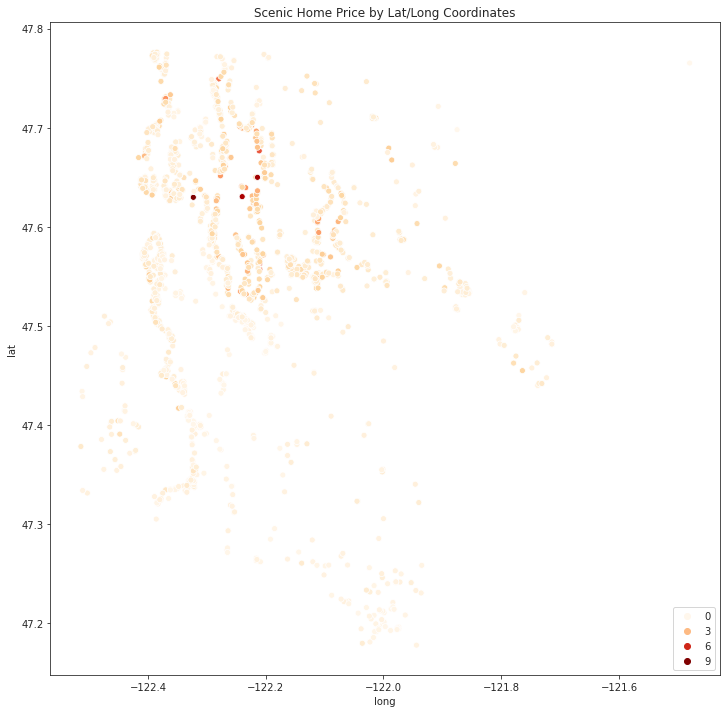

In [12]:
sns.set_style(style='ticks')
plt.figure(figsize=(12, 12))
ax = sns.scatterplot(x='long', y='lat', hue=scenic_df.price.tolist(), palette='OrRd', data=scenic_df)
# add a title manually
ax.legend(title='price')
plt.legend(loc='lower right')
plt.title('Scenic Home Price by Lat/Long Coordinates')

Text(0.5, 1.0, 'Scenic Home (Waterfront status) by Lat/Long Coordinates')

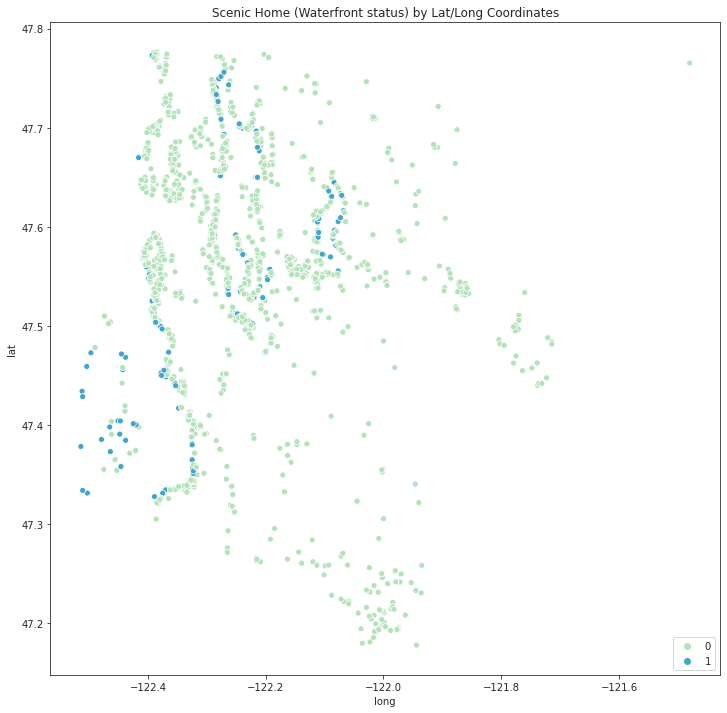

In [13]:
sns.set_style(style='ticks')
plt.figure(figsize=(12, 12))
ax = sns.scatterplot(x='long', y='lat', hue=scenic_df.waterfront.tolist(), palette='GnBu', data=scenic_df)
# add a title manually
ax.legend(title='waterfront')
plt.legend(loc='lower right')
plt.title('Scenic Home (Waterfront status) by Lat/Long Coordinates')

Text(0.5, 1.0, 'Scenic Home (View status) by Lat/Long Coordinates')

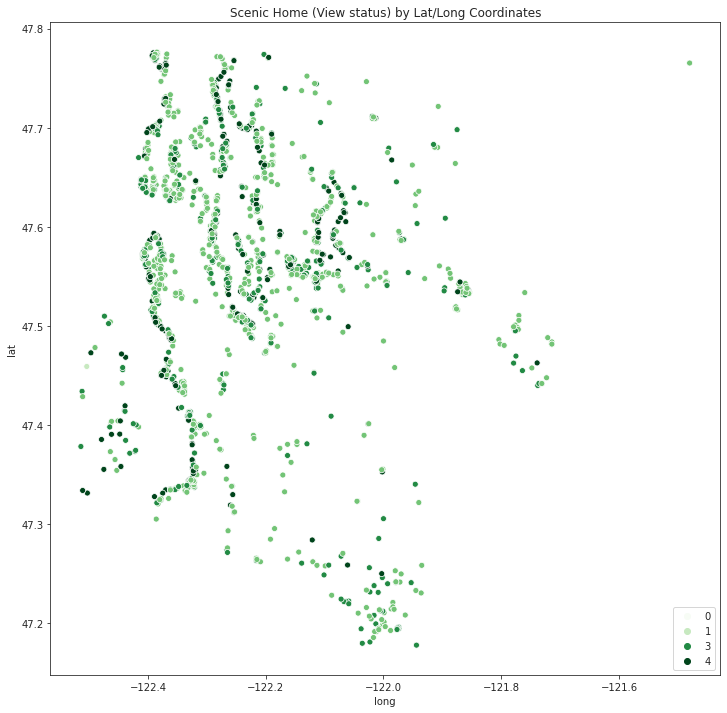

In [14]:
sns.set_style(style='ticks')
plt.figure(figsize=(12, 12))
ax = sns.scatterplot(x='long', y='lat', hue=scenic_df.view_rank.tolist(), palette='Greens', data=scenic_df)
# add a title manually
ax.legend(title='view_rank')
plt.legend(loc='lower right')
plt.title('Scenic Home (View status) by Lat/Long Coordinates')

In [15]:
# group the scenic homes by zip code. lat/long is cool to get geo idea but buyers use zipcode to search.
scenic_by_zip = scenic_df.groupby('zipcode')['id'].count()
scenic_by_zip.sort_values(ascending=False, inplace=True)
print(len(scenic_by_zip))
print(scenic_by_zip.values)
print(scenic_by_zip.index)
# there are 69 out of 70 zip codes and some have very few scenic homes. 

69
[104  73  70  65  63  59  56  56  56  52  51  51  47  46  42  41  40  37
  37  37  36  36  35  34  33  30  26  25  25  24  24  23  23  23  23  23
  20  19  18  14  14  13  11  11  10  10  10   8   8   8   8   7   7   6
   6   6   5   4   4   4   4   4   3   2   2   2   1   1   1]
Int64Index([98006, 98040, 98177, 98199, 98116, 98022, 98126, 98166, 98144,
            98198, 98136, 98178, 98033, 98008, 98118, 98070, 98115, 98034,
            98075, 98119, 98065, 98117, 98146, 98103, 98125, 98004, 98056,
            98155, 98045, 98003, 98122, 98109, 98027, 98074, 98105, 98107,
            98023, 98092, 98112, 98028, 98052, 98001, 98029, 98106, 98014,
            98055, 98053, 98042, 98188, 98024, 98059, 98072, 98108, 98038,
            98039, 98102, 98005, 98011, 98058, 98133, 98032, 98010, 98030,
            98168, 98007, 98019, 98077, 98031, 98002],
           dtype='int64', name='zipcode')


Text(0, 0.5, 'Scenic Homes')

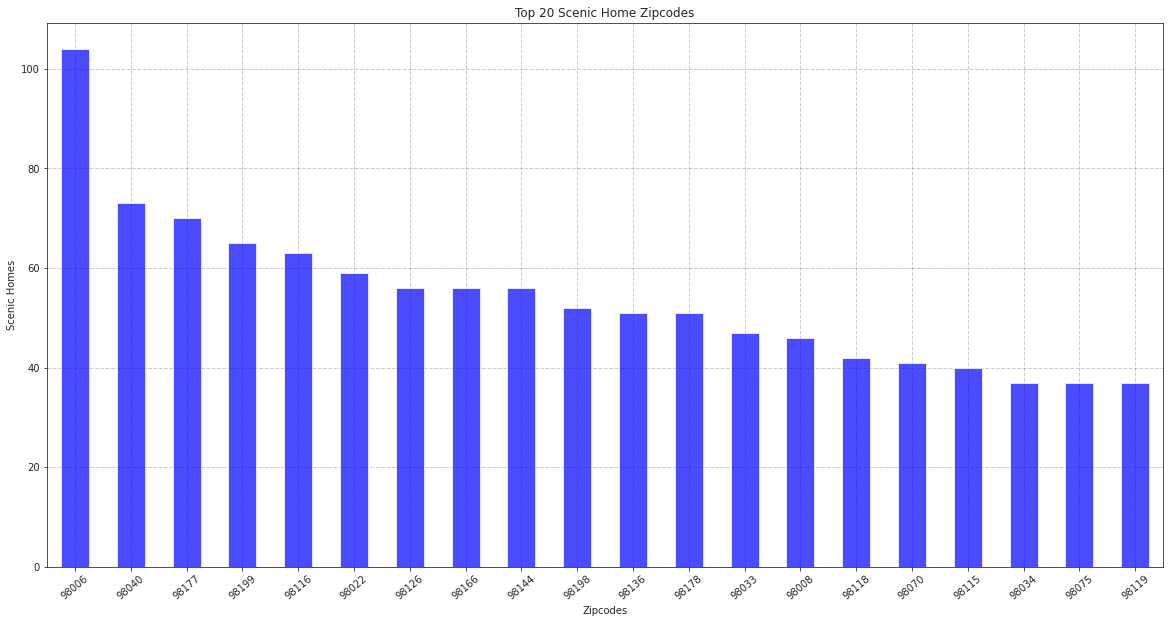

In [16]:
# Let's just focus on the top 20 zip codes
fig = plt.figure(figsize = (20, 10))
#plt.bar(scenic_by_zip.index, scenic_by_zip, color = 'red', alpha = 0.60)
scenic_by_zip.nlargest(20).plot.bar(rot=40, alpha = 0.70, color='blue', title='Top 20 Scenic Home Zipcodes')
plt.grid(color = 'black', alpha = 0.2, linestyle = '--', linewidth = 1)
#plt.title('Zipcodes with Scenic Homes)
plt.xlabel('Zipcodes')
plt.ylabel('Scenic Homes')

In [17]:
sns.set_style(style='ticks')

def plot_grouped_boxplot(plot_x, plot_y, plot_hue, plot_data, pal):
    sns.boxplot(x=plot_x, y=plot_y, hue=plot_hue, data=plot_data, palette=pal)
    sns.despine(offset=10, trim=True)
    plt.show()


def plot_grouped_violin(plot_x, plot_y, plot_hue, plot_hue_order, plot_data, pal):
    ax = sns.catplot(x=plot_x, y=plot_y, hue=plot_hue, kind='violin', hue_order=plot_hue_order, data=plot_data, palette=pal)
    plt.show()

###  Intuition (and if you have bought property,experience) informs us that scenic homes are more expensive than homes without scenic attributes (waterfront and/or better than average view rank). Let's do some data visualizate to literally see if that is true.  Comparing regular home price distribution to scenic home price distribution by zip code.

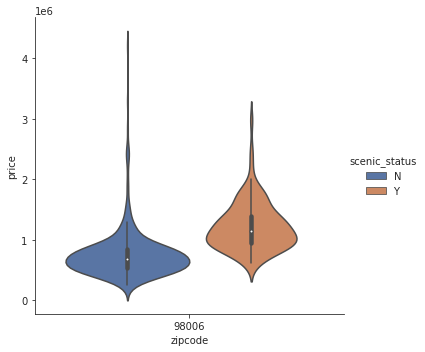

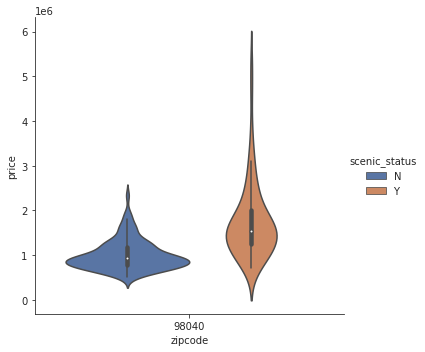

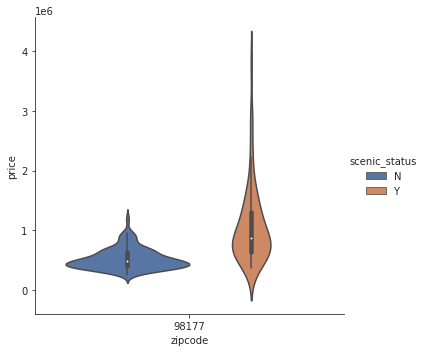

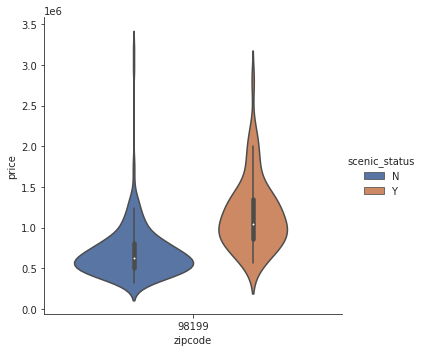

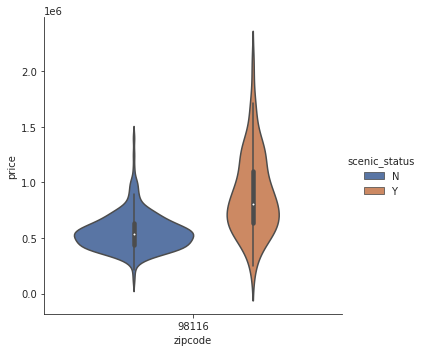

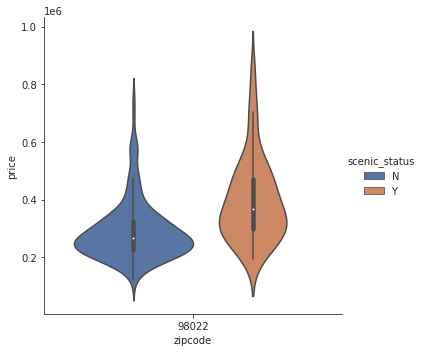

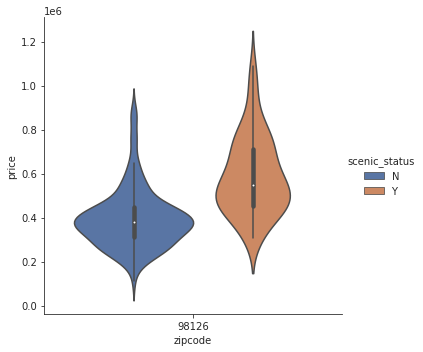

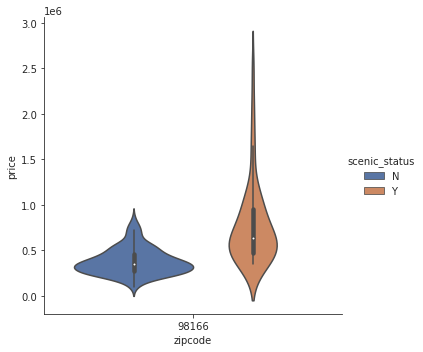

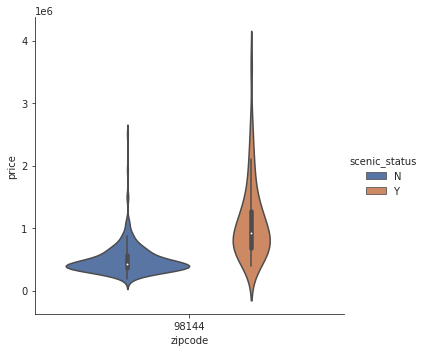

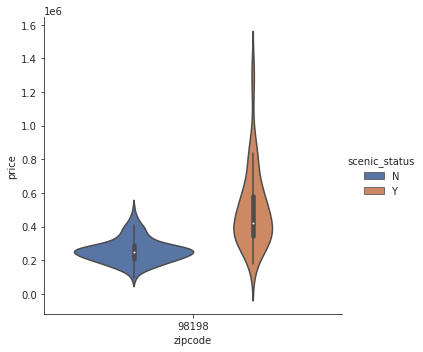

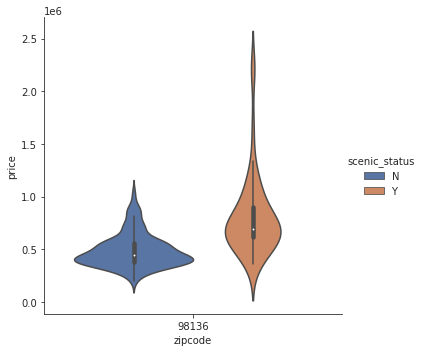

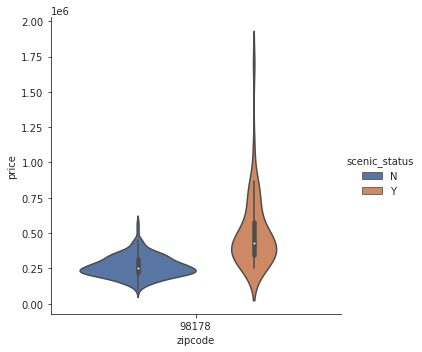

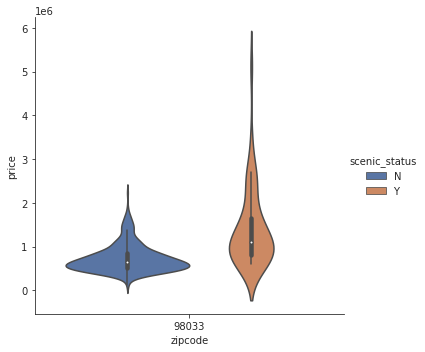

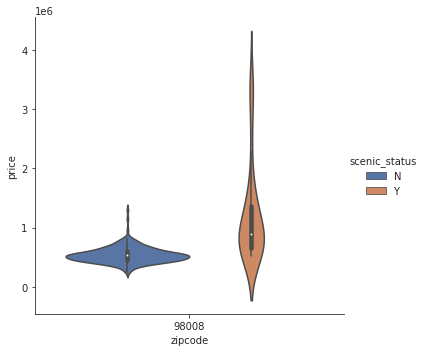

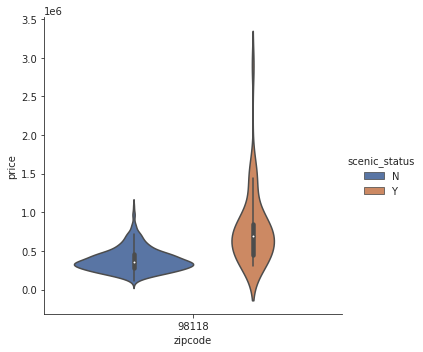

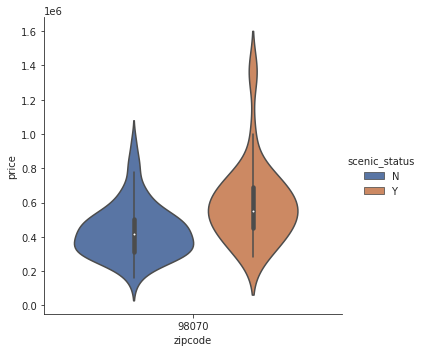

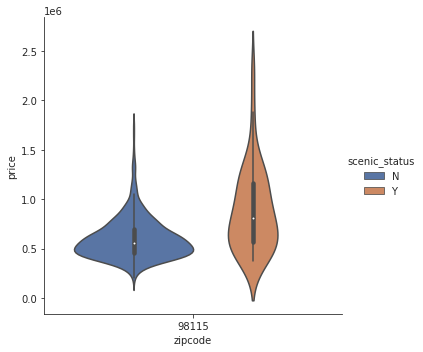

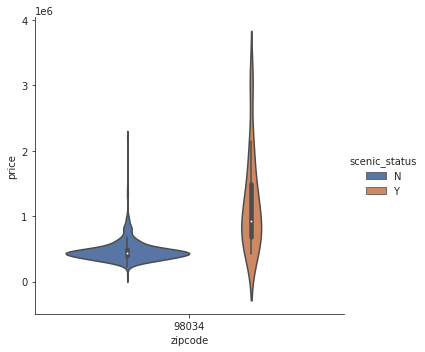

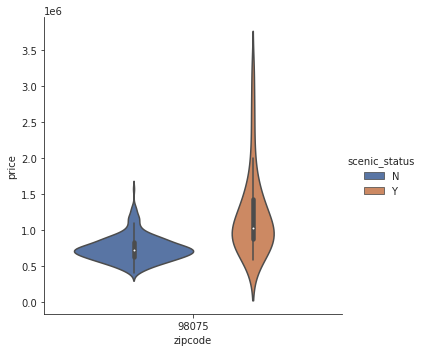

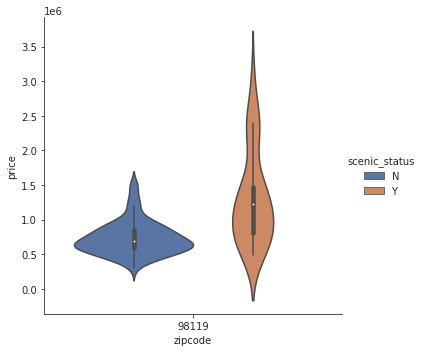

In [18]:
# In an attempt to have a more fair comparision between homes, compare homes in the same zip code.

for zip in scenic_by_zip.nlargest(20).index.values:
    scenic_zip_df = df[(df['zipcode'] == zip)]
    plot_grouped_violin('zipcode', 'price', 'scenic_status', ['N', 'Y'], scenic_zip_df, 'deep')
    


# FUTURE WORK ideas below

# FUTURE WORK Persona: King County government officals. 

Framing some possitble questions from the POV of County government officals.  Residential property tax assessors, county/city planning that want to learn about economic factors/data related to Residential property. Here are examples;
* Does my zip code price out residents? Does the city/county need to work on making homes more affordable?
* Are lots too small/overcrowding/stressing infrastucture?  Are there differences in lot size between zip codes?
* Are the homes good quality/newer/renovated if older. Are there differences between zip codes in home quality?
* What percentage of homes are being renovated? What types of homes (large/small/historic/older) are being renovated? 
* For property tax assessment purposes, exploring home living area and lot compared to neighbors. Are homes that are larger than neigbhoring homes getting a 'tax break' in being comparied to smaller properties?

### Group by zipcode and look at the differences in 1)sales price 2)sqft_living 3) sqft_lot 4)yr_built  5)anything else interesting.

In [19]:
np.sort(zipcodes)

array([98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010,
       98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029,
       98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042,
       98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070,
       98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106,
       98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119,
       98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155,
       98166, 98168, 98177, 98178, 98188, 98198, 98199])

In [20]:
df.groupby('zipcode')['id'].count()

zipcode
98001    358
98002    197
98003    276
98004    315
98005    168
        ... 
98177    254
98178    258
98188    135
98198    275
98199    316
Name: id, Length: 70, dtype: int64

In [21]:
df.groupby(['zipcode', 'date_year'])['id'].count()

zipcode  date_year
98001    2014         242
         2015         116
98002    2014         130
         2015          67
98003    2014         180
                     ... 
98188    2015          53
98198    2014         177
         2015          98
98199    2014         213
         2015         103
Name: id, Length: 140, dtype: int64

In [22]:
df.groupby(['zipcode', 'date_year'])['price'].mean()

zipcode  date_year
98001    2014        276,765.96
         2015        293,749.01
98002    2014        234,703.72
         2015        234,418.51
98003    2014        294,879.34
                        ...    
98188    2015        303,355.19
98198    2014        313,965.66
         2015        289,613.93
98199    2014        791,801.00
         2015        795,293.35
Name: price, Length: 140, dtype: float64

In [23]:
df.groupby(['zipcode', 'date_year'])['price'].median()

zipcode  date_year
98001    2014        255,000.00
         2015        277,500.00
98002    2014        234,500.00
         2015        235,000.00
98003    2014        263,750.00
                        ...    
98188    2015        265,000.00
98198    2014        265,000.00
         2015        272,475.00
98199    2014        696,000.00
         2015        680,000.00
Name: price, Length: 140, dtype: float64

In [24]:
df.groupby(['zipcode', 'date_year'])['price'].min()

zipcode  date_year
98001    2014        100,000.00
         2015        110,000.00
98002    2014        112,000.00
         2015         95,000.00
98003    2014        128,000.00
                        ...    
98188    2015        110,000.00
98198    2014         95,000.00
         2015         95,000.00
98199    2014        330,000.00
         2015        323,000.00
Name: price, Length: 140, dtype: float64

In [25]:
df.groupby(['zipcode', 'date_year'])['price'].max()

zipcode  date_year
98001    2014          850,000.00
         2015          639,900.00
98002    2014          367,500.00
         2015          389,000.00
98003    2014          950,000.00
                         ...     
98188    2015          707,000.00
98198    2014        1,350,000.00
         2015          770,000.00
98199    2014        3,200,000.00
         2015        2,800,000.00
Name: price, Length: 140, dtype: float64

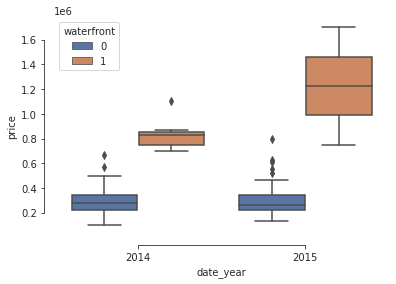

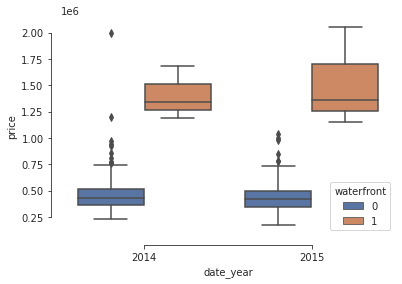

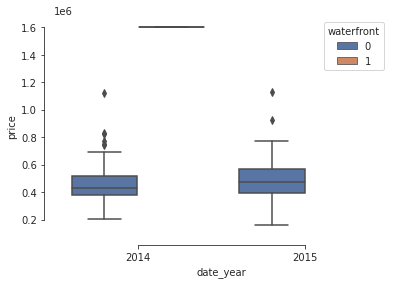

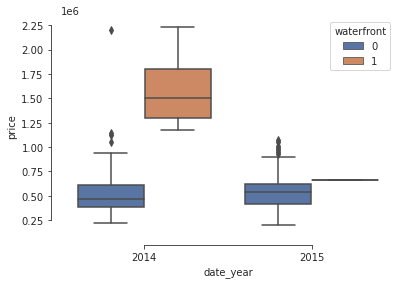

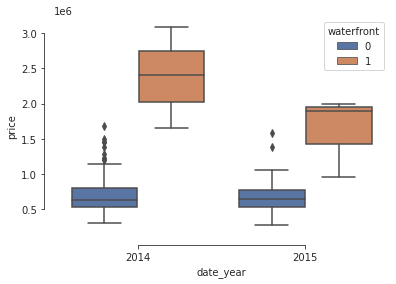

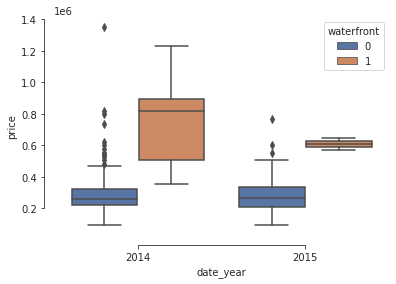

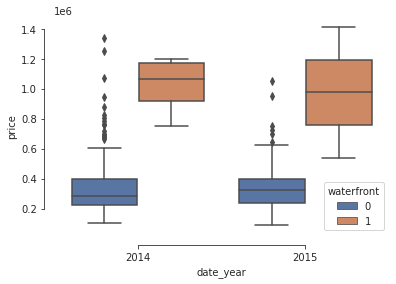

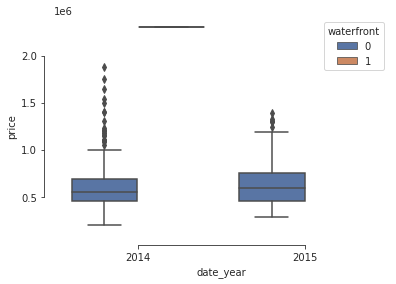

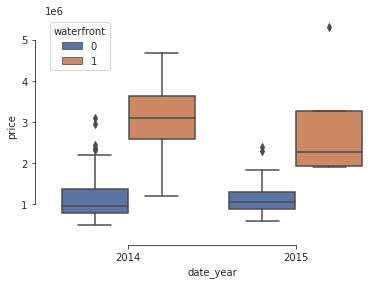

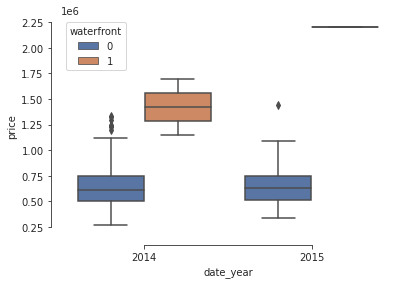

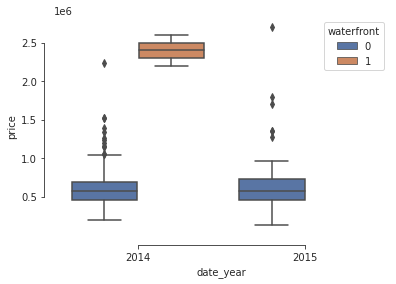

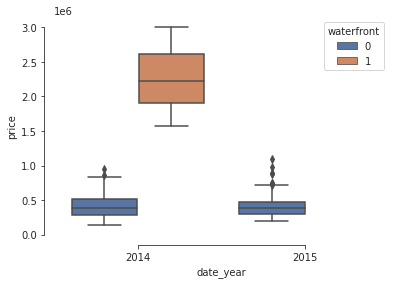

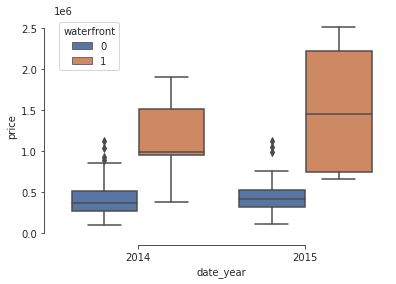

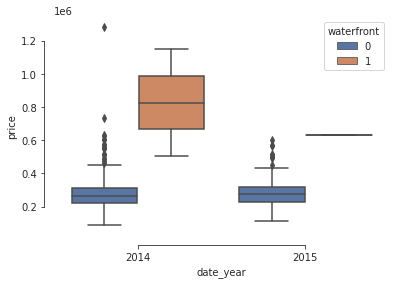

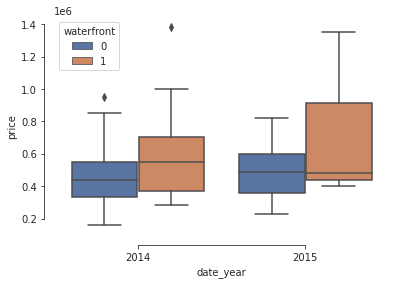

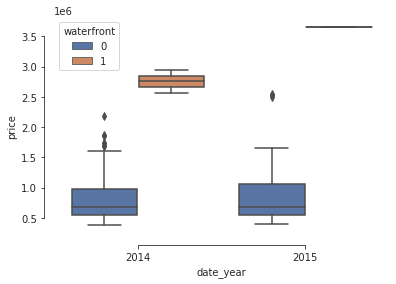

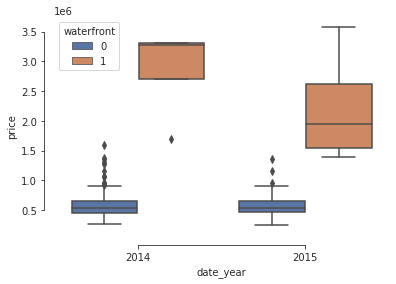

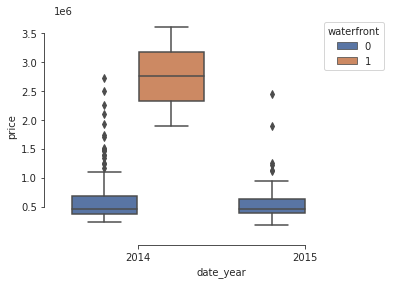

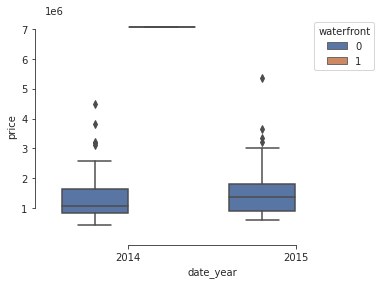

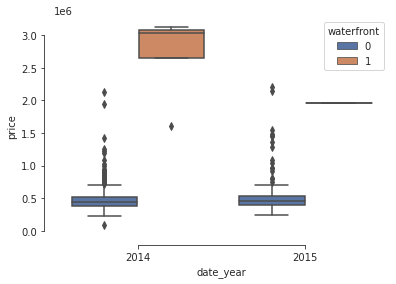

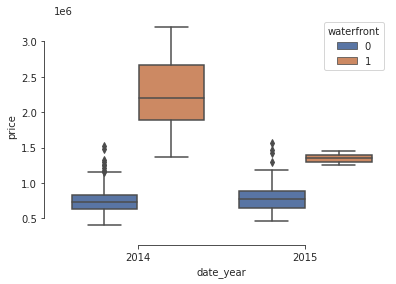

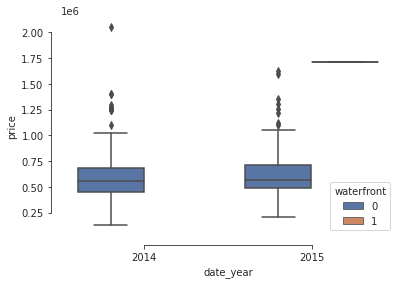

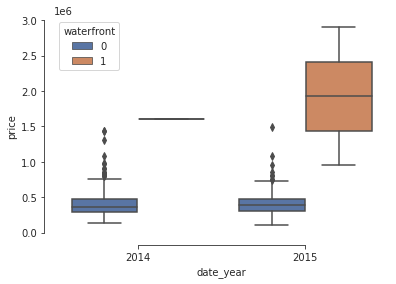

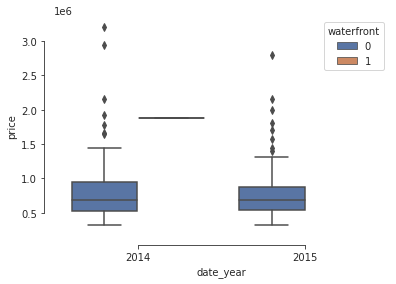

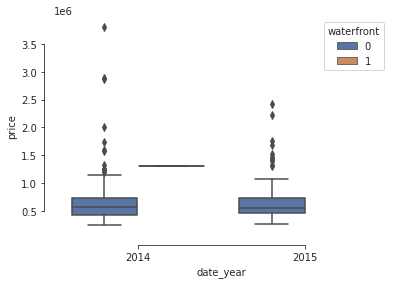

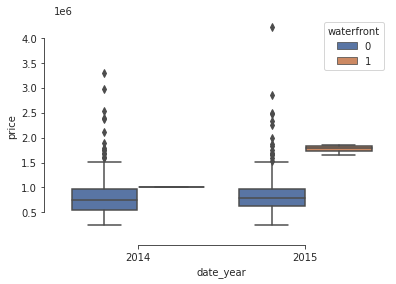

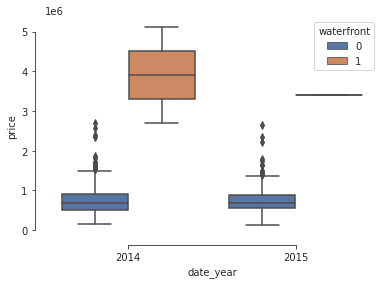

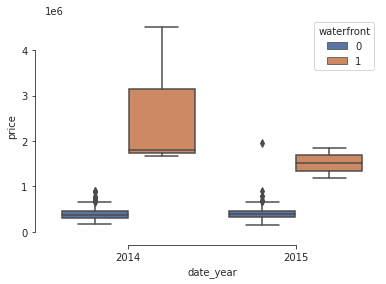

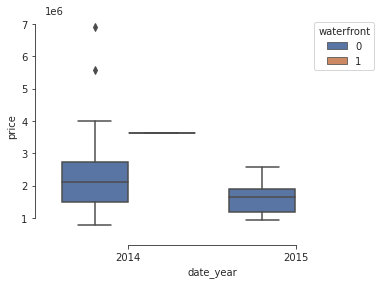

In [26]:
sns.set_palette(palette='pastel')

for zip in zipcodes:
    zipcode_df = df[(df['zipcode'] == zip)]
    if zipcode_df['waterfront'].max() == 1.0:
        plot_grouped_boxplot('date_year', 'price', 'waterfront', zipcode_df, 'deep') 

In [27]:
#for zip in zipcodes:
#    zipcode_df = df[(df['zipcode'] == zip)]
#    if zipcode_df['view_rank '].max() != zipcode_df['view_rank '].min():
#        plot_grouped_boxplot('date_year', 'price', 'view_rank ', zipcode_df) 

### What percentage of homes in the county are renovated? Consider breaking down by zipcode and year sold built

In [28]:
print("----renovated status UNK, N, Y---")
print(df[df['renovated_status'] == 'UNK'].shape)
print(df[df['renovated_status'] == 'N'].shape)
print(df[df['renovated_status'] == 'Y'].shape)


----renovated status UNK, N, Y---
(17099, 28)
(3581, 28)
(740, 28)


In [29]:
df.groupby(['zipcode', 'date_year'])['id'].count()

zipcode  date_year
98001    2014         242
         2015         116
98002    2014         130
         2015          67
98003    2014         180
                     ... 
98188    2015          53
98198    2014         177
         2015          98
98199    2014         213
         2015         103
Name: id, Length: 140, dtype: int64

In [30]:
df.groupby(['zipcode', 'date_year'])['view_rank'].count()

zipcode  date_year
98001    2014         242
         2015         116
98002    2014         130
         2015          67
98003    2014         180
                     ... 
98188    2015          53
98198    2014         177
         2015          98
98199    2014         213
         2015         103
Name: view_rank, Length: 140, dtype: int64

In [31]:
renovated_yes = df.loc[df['renovated_status']=='Y']
renovated_no_unk = df.loc[df['renovated_status']!='Y']

print(renovated_yes.groupby(['zipcode', 'date_year'])['id'].count())
print(renovated_no_unk.groupby(['zipcode', 'date_year'])['id'].count())

zipcode  date_year
98001    2014          1
         2015          3
98002    2014          4
         2015          1
98003    2014          1
                      ..
98188    2015          2
98198    2014          8
         2015          1
98199    2014         19
         2015          4
Name: id, Length: 127, dtype: int64
zipcode  date_year
98001    2014         241
         2015         113
98002    2014         126
         2015          66
98003    2014         179
                     ... 
98188    2015          51
98198    2014         169
         2015          97
98199    2014         194
         2015          99
Name: id, Length: 140, dtype: int64


###  Exploring home living area and lot compared to neighbors 

In [32]:
print("--- df shape---")
print(df.shape)
print("--- no difference between home/lot and neighbors ---")
print(df[df['sqft_living15_diff'] == 0].shape)
print(df[df['sqft_lot15_diff'] == 0].shape)
print("---- home/lot LARGER than neighbors---")
print(df[df['sqft_living15_diff'] > 0].shape)
print(df[df['sqft_lot15_diff']>0].shape)
print("---- home/lot SMALLER than neighbors---")
print(df[df['sqft_living15_diff'] < 0].shape)
print(df[df['sqft_lot15_diff']<0].shape)

--- df shape---
(21420, 28)
--- no difference between home/lot and neighbors ---
(2541, 28)
(4436, 28)
---- home/lot LARGER than neighbors---
(9772, 28)
(8518, 28)
---- home/lot SMALLER than neighbors---
(9107, 28)
(8466, 28)
